# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>Garbage Classification</b></div>

<a id="description"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>Project Description</b></div>


<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">
    <p>
        This project focuses on garbage classification using deep learning techniques to automatically identify and categorize waste into 10 different classes:

** Metal
** Glass
** Biological Waste
** Paper
** Battery Waste
** General Trash
** Cardboard
** Shoes
** Clothes
** Plastic
The goal is to develop a robust image classification model that can classify garbage items based on their visual features. This system can help improve waste management efficiency and promote better recycling practices.

</p>
</div>

<a id="About"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>About Author</b></div>

<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">
    <p>
      I am <b>Amr Ghanem</b>, a 4th-year student at the Faculty of Engineering, Tanta University, with a passion for AI and Data Science. My journey into the world of technology is driven by curiosity and enthusiasm to explore the endless possibilities that data and AI offer. I am continuously learning and honing my skills in data analysis, machine learning, and AI to build a strong foundation for my future career. My goal is to contribute to innovative projects and make a meaningful impact in the tech industry.
    </p>
    <p>
        You can find more about me on my:<br>
        <a href="https://www.linkedin.com/in/amr-ghanem-306b392b9/" target="_blank">LinkedIn</a>.<br>
        <a href="https://www.kaggle.com/amrgghanem" target="_blank">Kaggle</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

<a id="Contents"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Table of Contents </b></div>


<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">

- <a href="#1">1. Importing Libraries</a>
    
- <a href="#2">2. Loading the Dataset</a> 

- <a href="#3">3. Visualizing the Images</a>

- <a href="#4">4. Images Preproccessing</a>
- <a href="#4.1">Modeling</a> 
- <a href="#4.2">5. EfficientNetB3</a>

- <a href="#4.3"> 5.1EfficientNetB3 Compile & Trraining</a>
    
- <a href="#4.4">6. ResNet50</a>

- <a href="#4.3"> 6.1 ResNet50 Compile & Trraining</a>
    
- <a href="#4.3"> 7 CNN</a>

- <a href="#4.3"> 7.1 CNN Compile & Trraining</a>
     

- <a href="#5">8. Models Comparison Accuracy and loss</a>
- <a href="#5.1">9 Prediction</a> 
- <a href="#5.2">10 Predict First Class</a>
- <a href="#5.2">11 Thank You </a>
    
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>1. Importing Libraries</b></div>

In [1]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import os,warnings, random,shutil
warnings.filterwarnings('ignore')

from tensorflow.keras.applications import ResNet50,EfficientNetB3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>2. Loading the Dataset</b></div>

In [2]:
data_path=('/kaggle/input/garbage-classification-v2/garbage-dataset')
classes_names=os.listdir(data_path)
classes_names

['metal',
 'glass',
 'biological',
 'paper',
 'battery',
 'trash',
 'cardboard',
 'shoes',
 'clothes',
 'plastic']

In [3]:
out_dir='/kaggle/working/'

train_dir=os.path.join(out_dir,'train')
valid_dir=os.path.join(out_dir,'valid')
test_dir=os.path.join(out_dir,'test')

for folder in [train_dir, valid_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

In [4]:


# Train-Validation-Test Split Ratios
train_ratio = 0.7  # 70% Training
valid_ratio = 0.15  # 15% Validation
test_ratio = 0.15   # 15% Testing

# Iterate over each class in the dataset
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files
    
    # Get all image file names
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    # Shuffle images
    random.shuffle(image_files)
    
    # Split images into train, validation, and test sets
    train_imgs, temp_imgs = train_test_split(image_files, test_size=(1 - train_ratio), random_state=42)
    valid_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + valid_ratio)), random_state=42)

    # Create class directories in train, valid, and test folders
    for folder in [train_dir, valid_dir, test_dir]:
        os.makedirs(os.path.join(folder, class_name), exist_ok=True)

    # Move images to corresponding folders
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    
    for img in valid_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(valid_dir, class_name, img))
    
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>3. Visualizing the Images</b></div>

In [5]:
classes_path='/kaggle/working/train'
image_classes=os.listdir(classes_path)


def plot_images(image_classes):
    plt.figure(figsize=(15,5))

    for i,category in enumerate(image_classes):
        image_path=classes_path + '/' + category      ##Creaitng Category Path
        images_in_class=os.listdir(image_path)        ## Reading Images in each Category

        f_image=images_in_class[0]
        f_image_path=image_path + '/' + f_image           ##Creaitng First Image Path
    
        img=image.load_img(f_image_path)                  ## Loading it
        img_array=image.img_to_array(img)/255             ## Normalize Pixels in range [0:1]
 
        plt.subplot(2,5,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

plt.show()


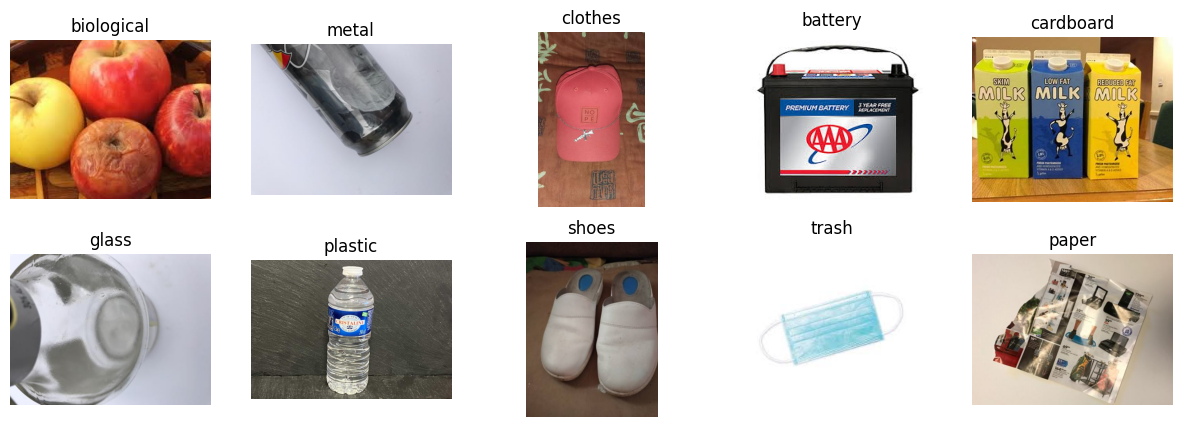

In [6]:
plot_images(image_classes)

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>4. Images Preproccessing</b></div>

In [7]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 preprocessing
    # rotation_range=20,      # Randomly rotate images by up to 20 degrees
    # width_shift_range=0.2,  # Shift width by up to 20% of the image
    # height_shift_range=0.2, # Shift height by up to 20% of the image
    # shear_range=0.2,        # Shear transformation
    # zoom_range=0.3,         # Randomly zoom in on images
    # horizontal_flip=True,   # Flip images horizontally
    # fill_mode='nearest'     # Fill empty pixels after transformations
)

# No augmentation for validation and test sets (only rescaling)
valid_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=100,  
    class_mode='categorical'
)

# Validation Data Generator
valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=100,
    class_mode='categorical'
)

# Test Data Generator (without labels, for predictions)
test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=1,
    class_mode=None,
    shuffle=False,  # Don't shuffle test images
    seed=123
)

Found 13825 images belonging to 10 classes.
Found 2966 images belonging to 10 classes.
Found 2971 images belonging to 10 classes.


In [8]:
calss_labels=train_generator.class_indices
print(calss_labels)

{'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}


<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Modeling</b></div>

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>5. EfficientNetB3</b></div>

In [9]:
base_model=EfficientNetB3(include_top=False,pooling='avg',weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add new layers
x = Dense(128, activation='relu')(base_model.output)
x = Dense(64, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)  # Adjust output neurons as needed

# Define the new model
model_1 = Model(inputs=base_model.input, outputs=output_layer)

# Print model summary
model_1.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, None, None, 3)  │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, None, None, 3)  │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 40) │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 40) │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 40) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, None, None, 40) │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, None, None, 40) │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, None, None, 40) │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 10,989,177 (41.92 MB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>5.1. EfficientNetB3 Compile & Training</b></div>

In [10]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
early_stop=EarlyStopping(monitor='val_loss',patience=10)
cheackpoint=ModelCheckpoint(filepath='/kaggle/working/best.keras',monitor='val_loss',save_best_only=True,mode='auto')

In [12]:
history_1=model_1.fit(
           train_generator,
           steps_per_epoch=train_generator.samples//100,
           validation_data=valid_generator,
           validation_steps=valid_generator.samples//100,
           epochs=10,
           callbacks=[early_stop,cheackpoint]


    
)


Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 139s 663ms/step - accuracy: 0.7489 - loss: 0.8144 - val_accuracy: 0.9255 - val_loss: 0.2263
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.9300 - loss: 0.2398 - val_accuracy: 0.9545 - val_loss: 0.1817
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 65s 450ms/step - accuracy: 0.9406 - loss: 0.1889 - val_accuracy: 0.9383 - val_loss: 0.1937
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8800 - loss: 0.3273 - val_accuracy: 0.9394 - val_loss: 0.1655
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 65s 453ms/step - accuracy: 0.9584 - loss: 0.1322 - val_accuracy: 0.9434 - val_loss: 0.1919
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9600 - loss: 0.0965 - val_accuracy: 0.9545 - val_loss: 0.2142
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 65s 451ms/step - accuracy: 0.9692 - loss: 0.0950 - val_accuracy: 0.9421 - val_loss: 0.1906
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.1798 - 

In [13]:
model_1.save('EfficientNetB3.h5')

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>6. ResNet50</b></div>

In [14]:
# Load the base model without the top layer
base_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add new layers
x = Dense(128, activation='relu')(base_model.output)
x = Dense(64, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)  # Adjust output neurons as needed

# Define the new model
model_2 = Model(inputs=base_model.input, outputs=output_layer)

# Print model summary
model_2.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,858,890 (91.01 MB)

 Trainable params: 271,178 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>6.1. ResNet50 Compile & Training</b></div>

In [15]:
# sgd=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history_2=model_2.fit(
           train_generator,
           steps_per_epoch=train_generator.samples//100,
           validation_data=valid_generator,
           validation_steps=valid_generator.samples//100,
           epochs=10,
           callbacks=[early_stop,cheackpoint]


    
)


Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 91s 516ms/step - accuracy: 0.7867 - loss: 0.6645 - val_accuracy: 0.9317 - val_loss: 0.2108
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9000 - loss: 0.3000 - val_accuracy: 0.8636 - val_loss: 0.4630
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 66s 458ms/step - accuracy: 0.9490 - loss: 0.1558 - val_accuracy: 0.9345 - val_loss: 0.2020
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8900 - loss: 0.3156 - val_accuracy: 0.9394 - val_loss: 0.2297
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 64s 450ms/step - accuracy: 0.9594 - loss: 0.1130 - val_accuracy: 0.9355 - val_loss: 0.2055
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9600 - loss: 0.0985 - val_accuracy: 0.9697 - val_loss: 0.0913
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 64s 444ms/step - accuracy: 0.9853 - loss: 0.0531 - val_accuracy: 0.9417 - val_loss: 0.1779
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9800 - loss: 0.0535 - val

In [17]:
model_2.save('resnet50.h5')

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>7. CNN</b></div>

In [18]:
model_3=Sequential()

In [19]:
# Block 1
model_3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model_3.add(BatchNormalization())  
model_3.add(MaxPooling2D(pool_size=(2,2)))
# model_2.add(Dropout(0.25))  

# Block 2
model_3.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model_3.add(BatchNormalization())  
model_3.add(MaxPooling2D(pool_size=(2,2)))
# model_2.add(Dropout(0.25))

# Block 3
model_3.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model_3.add(BatchNormalization())  
model_3.add(MaxPooling2D(pool_size=(2,2)))
# model_2.add(Dropout(0.25))

# Block 4
model_3.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model_3.add(BatchNormalization())  
model_3.add(MaxPooling2D(pool_size=(2,2)))
# model_2.add(Dropout(0.25))

# Replace Flatten with Global Average Pooling
model_3.add(GlobalAveragePooling2D())

# Fully Connected Layer
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))  # Stronger dropout to prevent overfitting

# Output Layer (10 classes)
model_3.add(Dense(10, activation='softmax'))

In [20]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 458,698 (1.75 MB)

 Trainable params: 457,738 (1.75 MB)

 Non-trainable params: 960 (3.75 KB)

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>7.1. CNN Compile & Training</b></div>

In [21]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history_3=model_3.fit(train_generator,epochs=10,validation_data=valid_generator,verbose=1,
                     )

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 102s 581ms/step - accuracy: 0.3937 - loss: 1.8489 - val_accuracy: 0.3034 - val_loss: 2.2424
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 64s 445ms/step - accuracy: 0.5107 - loss: 1.4439 - val_accuracy: 0.5502 - val_loss: 1.3023
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 64s 440ms/step - accuracy: 0.5585 - loss: 1.3074 - val_accuracy: 0.6150 - val_loss: 1.1632
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 64s 443ms/step - accuracy: 0.6218 - loss: 1.1451 - val_accuracy: 0.6392 - val_loss: 1.0947
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 63s 428ms/step - accuracy: 0.6389 - loss: 1.0613 - val_accuracy: 0.6473 - val_loss: 1.0405
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 63s 436ms/step - accuracy: 0.6811 - loss: 0.9665 - val_accuracy: 0.6204 - val_loss: 1.1609
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 62s 430ms/step - accuracy: 0.7029 - loss: 0.8851 - val_accuracy: 0.6827 - val_loss: 0.9623
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 62s 423ms/step - accuracy: 0.7290 - loss: 

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>8. Models Acuuracy and Loss Comparison</b></div>

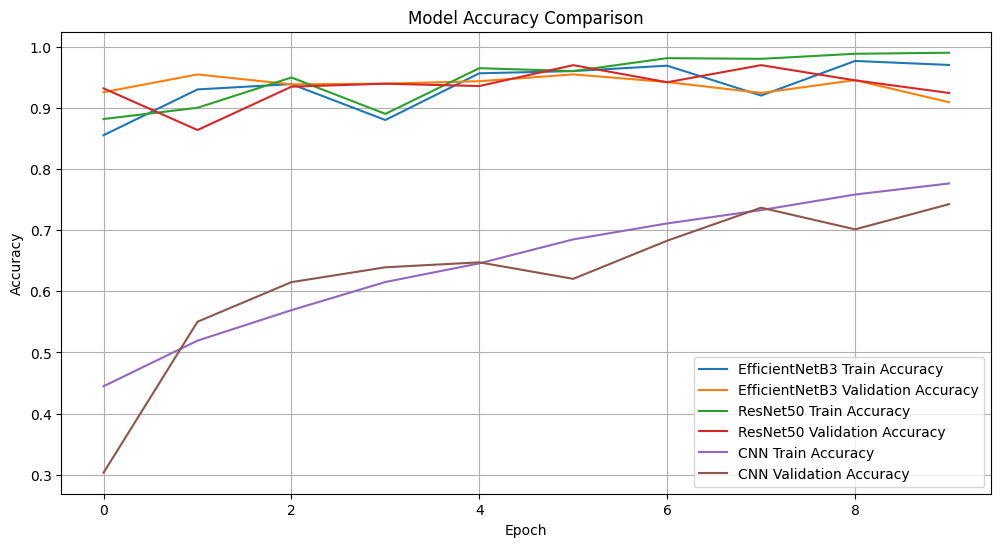

In [23]:
plt.figure(figsize=(12, 6))



#   EfficientNetB3
plt.plot(history_1.history['accuracy'], label='EfficientNetB3 Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='EfficientNetB3 Validation Accuracy')

# ResNet50
plt.plot(history_2.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='ResNet50 Validation Accuracy')

# CNN
plt.plot(history_3.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='CNN Validation Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

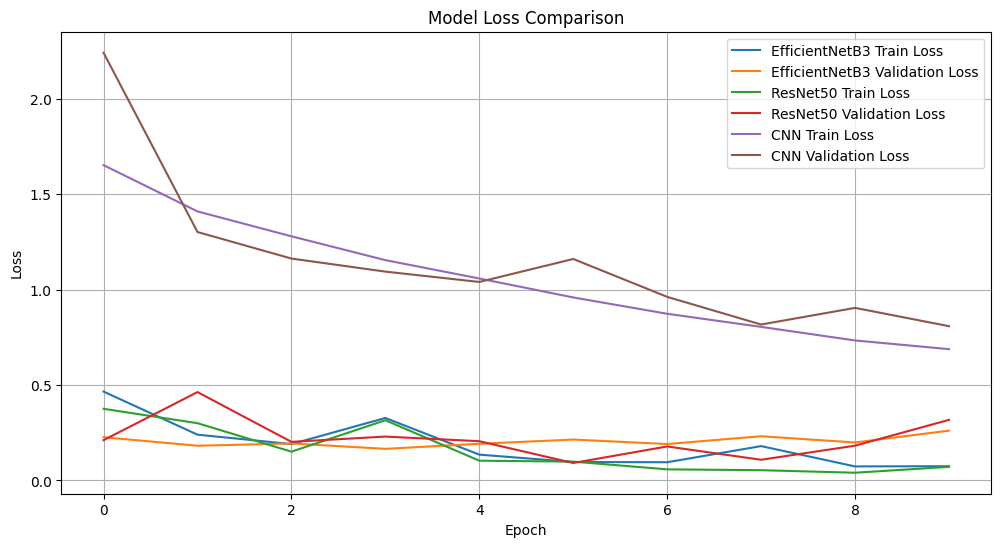

In [24]:
plt.figure(figsize=(12, 6))

# EfficientNetB3
plt.plot(history_1.history['loss'], label='EfficientNetB3 Train Loss')
plt.plot(history_1.history['val_loss'], label='EfficientNetB3 Validation Loss')


# ResNet50
plt.plot(history_2.history['loss'], label='ResNet50 Train Loss')
plt.plot(history_2.history['val_loss'], label='ResNet50 Validation Loss')

# CNN
plt.plot(history_3.history['loss'], label='CNN Train Loss')
plt.plot(history_3.history['val_loss'], label='CNN Validation Loss')

plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>9. Prediction</b></div>

In [25]:
pred=model_2.predict(test_generator,steps=len(test_generator),verbose=1)
pred_classes_indecies=np.argmax(pred,axis=1)

2971/2971 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step


In [26]:
class_labels=list(train_generator.class_indices.keys())
class_labels

['battery',
 'biological',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>10. Predict First Class</b></div>

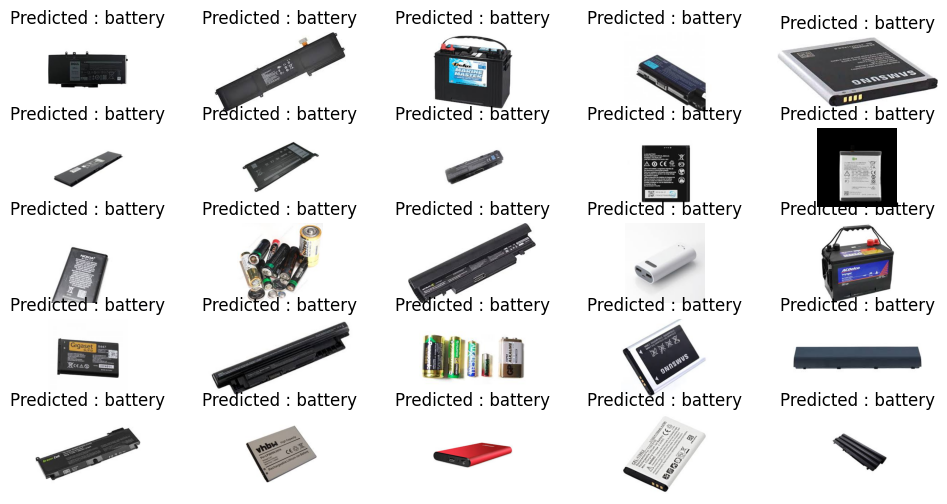

In [27]:
fig,ax=plt.subplots(5,5,figsize=(12,6))
for i in range(25):  # Loop through first 25 images
    img_path = os.path.join(test_dir, test_generator.filenames[i])  # Correct full path
    img = load_img(img_path)  # Load image
    
    predicted_class = class_labels[pred_classes_indecies[i]]

    ax[i//5 , i%5].imshow(img)
    ax[i//5 , i%5].axis('off')
    ax[i//5 , i%5].set_title(f"Predicted : {predicted_class}")

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b>11 Thank You For Visiting and Happy with Your FeedBack</b></div>